In [5]:
# importing packages
import pandas as pd
import numpy as np
from numpy import array
import matplotlib
import matplotlib as mpl
from matplotlib import rc
import seaborn as sns
from matplotlib.patches import Patch
# for plots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from matplotlib import ticker, cm
from sys import exit
from shapely.geometry import Point
from geopandas import GeoDataFrame as gdf

import plotly.express as px
import requests
from pathlib import Path
from zipfile import ZipFile
from matplotlib.patches import Patch
import geopandas as gpd
import plotly.graph_objects as go
import json
import zipfile
import shapefile as shp
import geoplot as gplt
import proplot
import warnings
warnings.filterwarnings('ignore')

In [11]:
file_path = "P:\\G\\1.1 research\\files_excel\\plotting.xlsx"

# Read the Excel file

df= pd.read_excel(file_path, sheet_name="aic1")
df

grid    lon    lat  model_no            model name  Unnamed: 5  \
0        g1  68.00  23.75        24           2stationary         NaN   
1        g2  68.00  24.00        24           2stationary         NaN   
2        g3  68.25  23.50        24           2stationary         NaN   
3        g4  68.25  23.75        24           2stationary         NaN   
4        g5  68.25  24.00        24           2stationary         NaN   
...     ...    ...    ...       ...                   ...         ...   
4959  g4960  97.00  28.00        32       2lin_loc&sc_oni         NaN   
4960  g4961  97.00  28.25        55  3lin_loc&exp(sc)_pdo         NaN   
4961  g4962  97.00  28.50        39  2lin_loc&exp(sc)_dmi         NaN   
4962  g4963  97.25  28.00        58  3lin_loc&exp(sc)_dmi         NaN   
4963  g4964  97.25  28.25        57  3lin_loc&exp(sc)_nao         NaN   

              RP    max_prep  
0     236.626090  294.653239  
1     213.930837  295.182170  
2     280.932445  284.693603  
3     263.959570  291.118317  
4     240.531655  293.702708  
...          ...         ...  
4959    7.617497  145.981581  
4960  275.680445  142.813095  
4961  488.004793  141.842421  
4962   32.818517  149.803497  
4963  277.261137  146.583820  

[4964 rows x 8 columns]

In [12]:
df["model name"].value_counts()

model name
2: MultiLinear - µ            1015
3: MultiLinear - µ             937
3: MultiLinear - µ, log(σ)     615
2: MultiLinear - µ, log(σ)     525
2: Quadratic -Time - µ         275
2: Linear - Time - µ, σ        270
2stationary                    170
2Qua_loc_pdo                   124
2Qua_loc_dmi                   120
2Qua_loc_oni                   100
2lin_loc&exp(sc)_time           87
3lin_loc&sc_dmi                 68
2lin_loc&sc_pdo                 56
2Qua_loc_nao                    56
2lin_loc&sc_oni                 53
2lin_loc&sc_dmi                 51
3Qua_loc_dmi                    46
2lin_loc&exp(sc)_oni            43
3Qua_loc_oni                    41
3Qua_loc_pdo                    40
2lin_loc&exp(sc)_pdo            39
2lin_loc&sc_nao                 34
2lin_loc&exp(sc)_nao            27
3lin_loc&sc_pdo                 24
2lin_loc&exp(sc)_dmi            21
3lin_loc&exp(sc)_pdo            20
3lin_loc&sc_oni                 18
3lin_loc&exp(sc)_dmi            17
3Qua_loc_

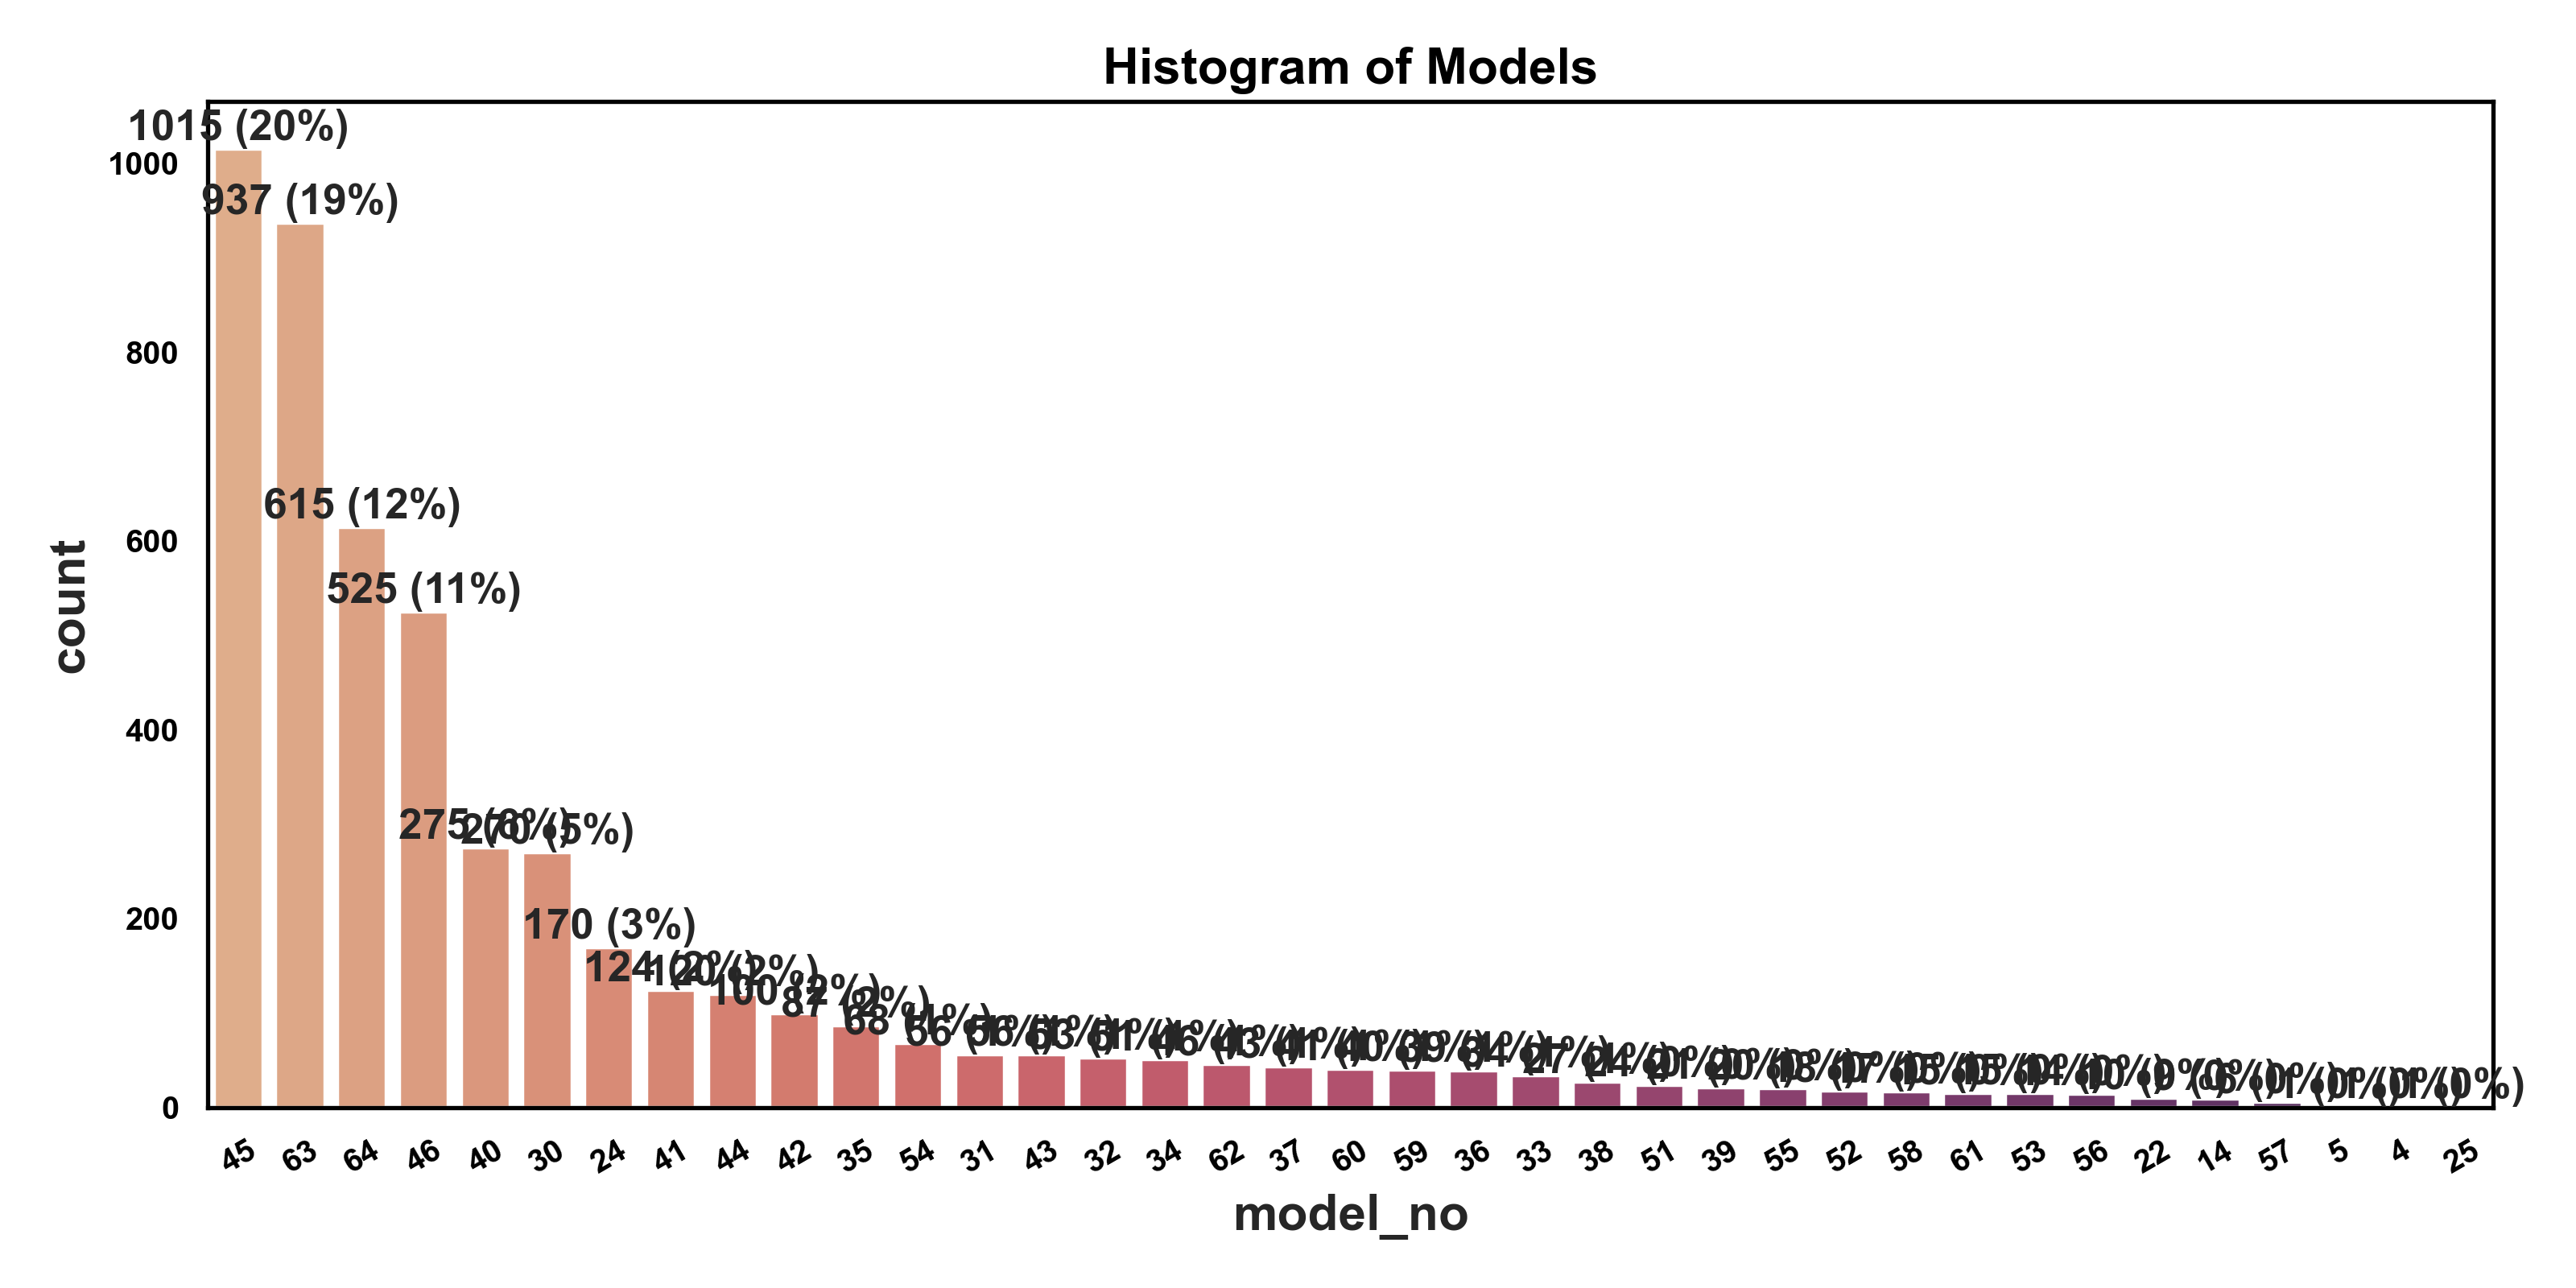

In [13]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10,5), dpi = 160.0)
ax = fig.add_subplot(111)
plt.title('Histogram of Models', fontsize=14, fontweight='bold')
ax.set_xlabel('Model Name', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.grid(False)
ax = sns.countplot(x=df['model_no'],
                   order=df['model_no'].value_counts(ascending=False).index, palette = "flare");
        
abs_values = df['model_no'].value_counts(ascending=False)
rel_values = df['model_no'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=12, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='center', fontsize=5, fontweight='bold')
for a in [ax]:
    for label in (a.get_xticklabels() + a.get_yticklabels()):
        label.set_fontsize(9)
        label.set_fontweight('bold')
for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
        ax.spines[axis].set_edgecolor("black")
        
fig.tight_layout()
plt.show()
# fig.savefig('P:\\G\\1.1 research\\result_pics\\hist_models.tif', dpi=300)

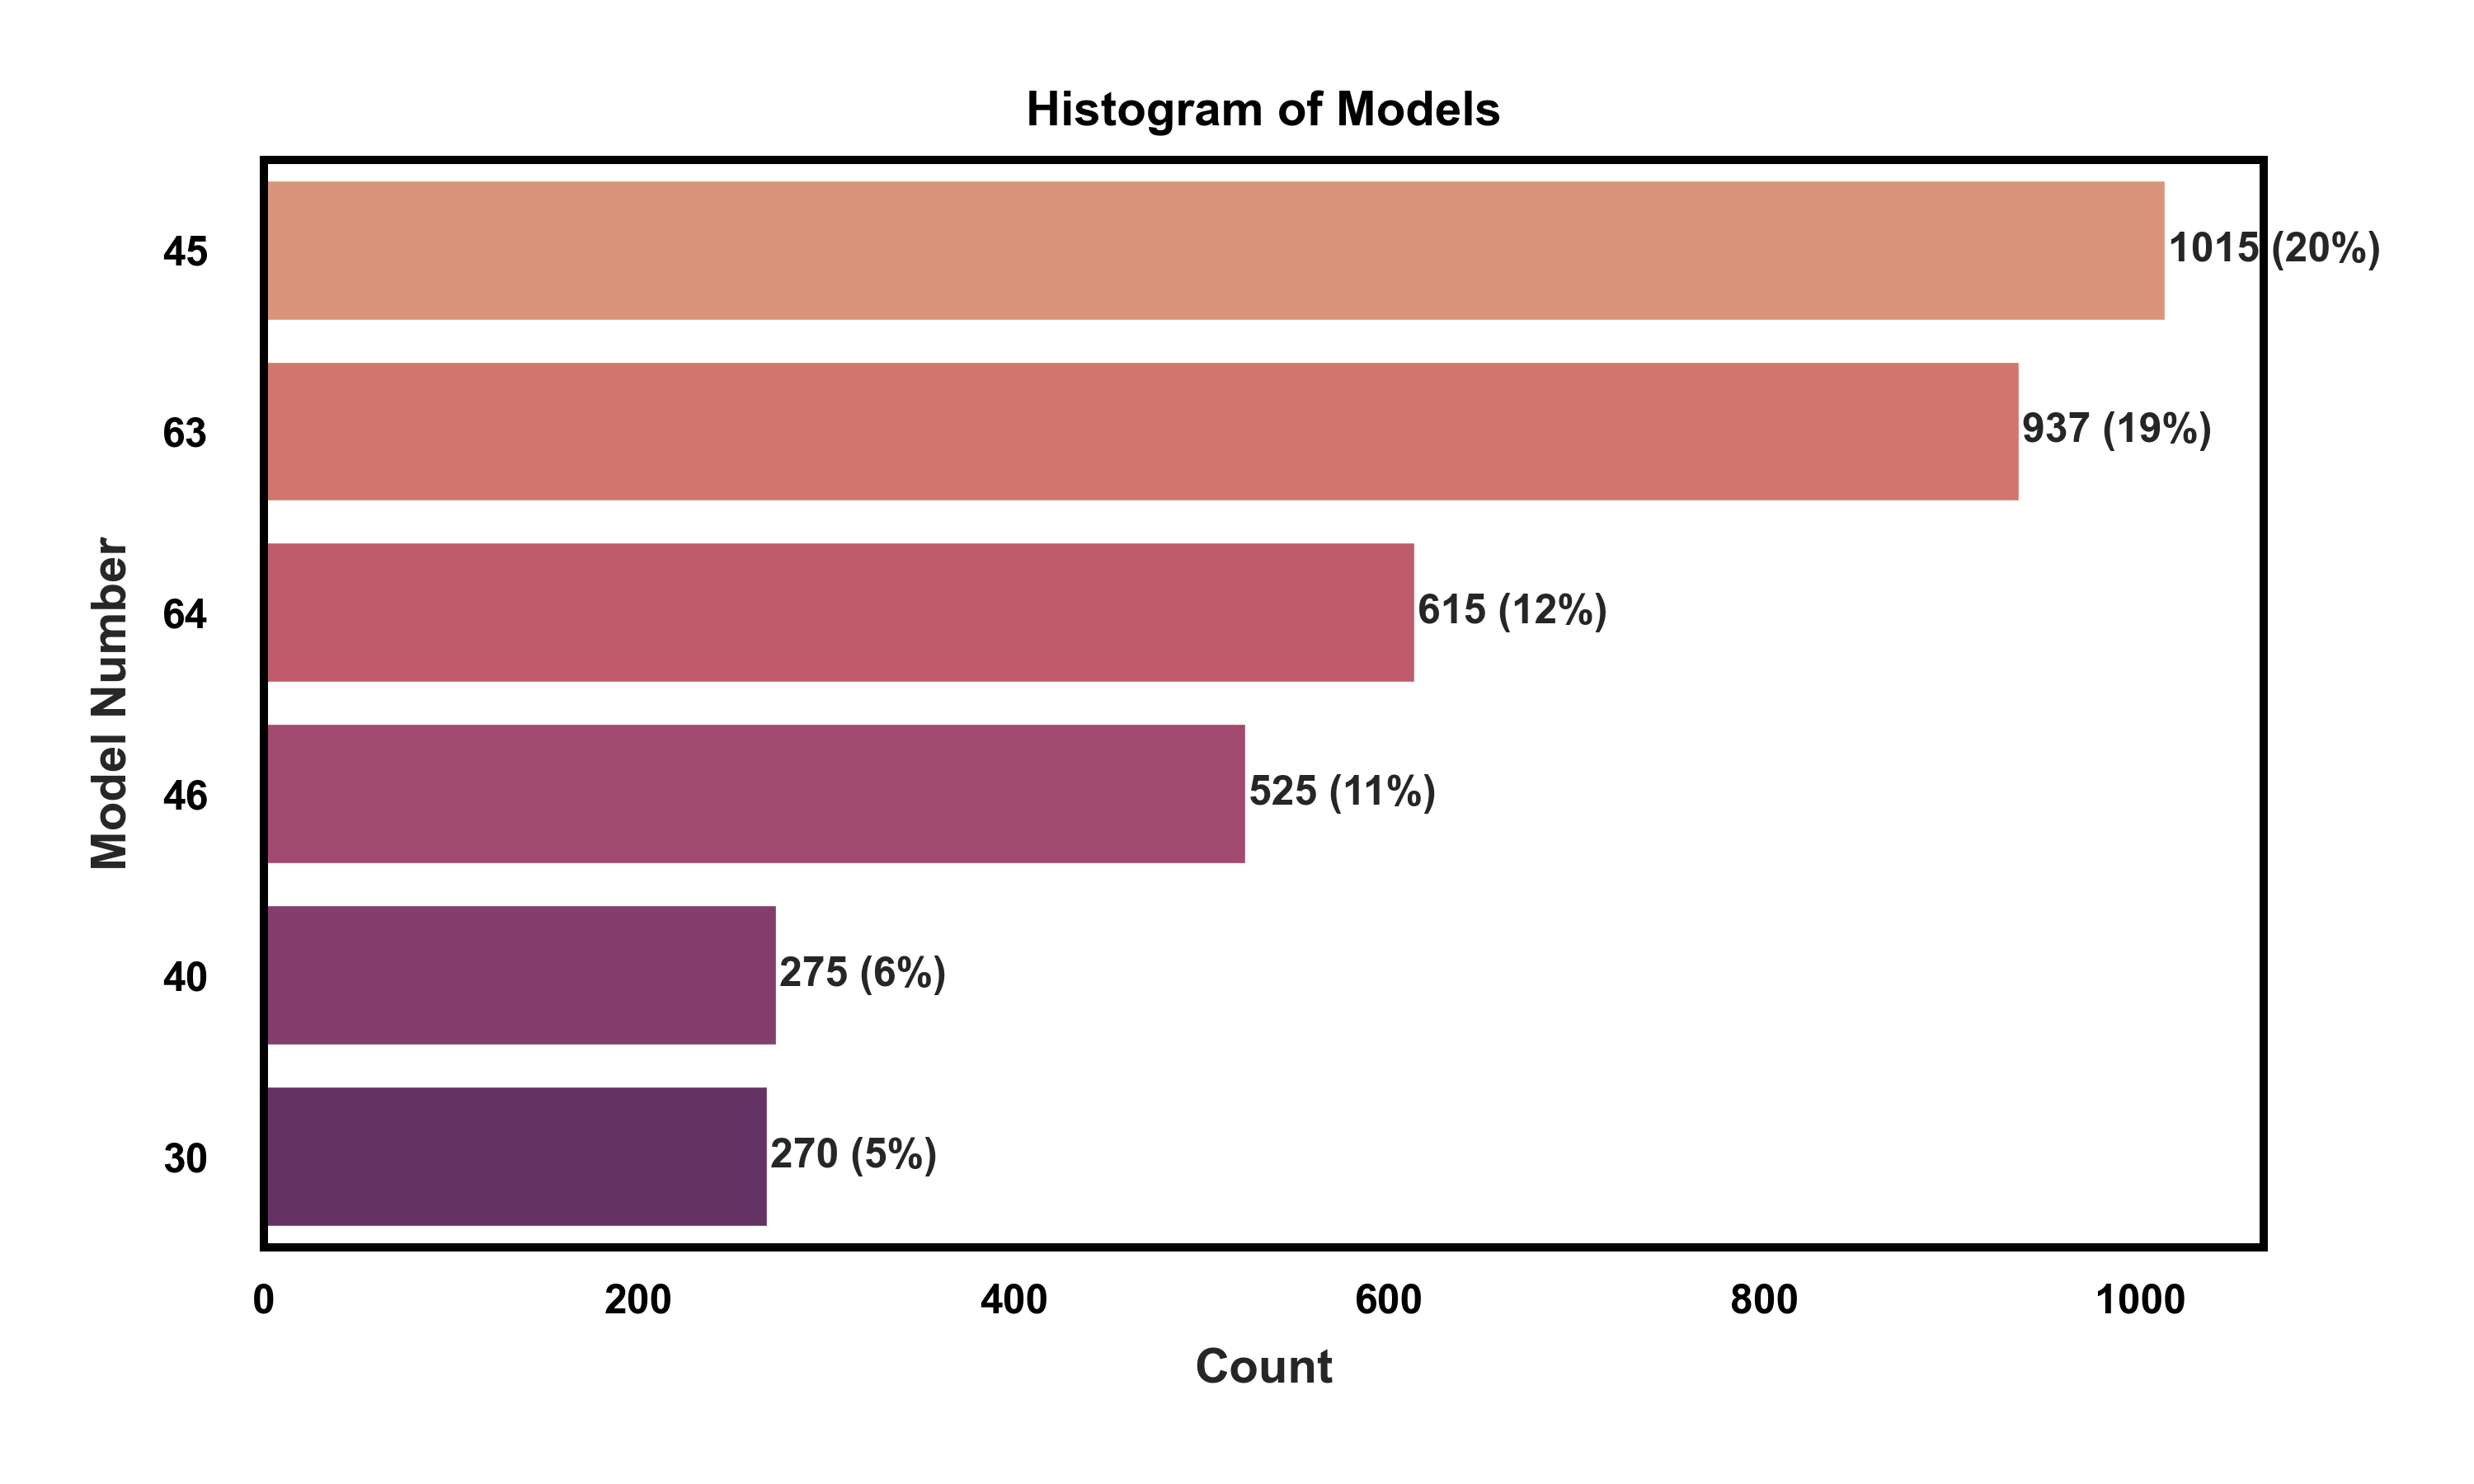

In [14]:
options = [45, 46, 63, 64, 30, 40]
  
# selecting rows based on condition
rslt_df = df[df['model_no'].isin(options)]

sns.set(style="whitegrid")
fig = plt.figure(figsize=(5,3), dpi = 300)
ax = fig.add_subplot(111)
ax.grid(False)
ax = sns.countplot(y=rslt_df['model_no'],
                   order=rslt_df['model_no'].value_counts(ascending=False).index, palette = 'flare');
ax.set_title('Histogram of Models', fontsize=7, fontweight='bold')
ax.set_xlabel('Count', fontsize=7, fontweight='bold')
ax.set_ylabel('Model Number', fontsize=7, fontweight='bold')       
abs_values = rslt_df['model_no'].value_counts(ascending=False)
rel_values = df['model_no'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=6, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=0, verticalalignment='center', fontsize=4, fontweight='bold')
for a in [ax]:
    for label in (a.get_xticklabels() + a.get_yticklabels()):
        label.set_fontsize(6)
        label.set_fontweight('bold')
for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
        ax.spines[axis].set_edgecolor("black")
        
fig.tight_layout()
plt.show()
# fig.savefig('P:\\G\\1.1 research\\result_pics\\hist_bestmodels.tif', dpi=300)

In [15]:
aa = ["2: MultiLinear - µ", "3: MultiLinear - µ"]
bb = ["2: MultiLinear - µ, log(σ)", "3: MultiLinear - µ, log(σ)"]
cc = ["2: Quadratic -Time - µ", "2: Linear - Time - µ, σ"]
# selecting rows based on condition
df1 = df[df['model name'].isin(aa)]
df2 = df[df['model name'].isin(bb)]
df3 = df[df['model name'].isin(cc)]
gb = df2.groupby('model name').apply(len)
gb

model name
2: MultiLinear - µ, log(σ)    525
3: MultiLinear - µ, log(σ)    615
dtype: int64

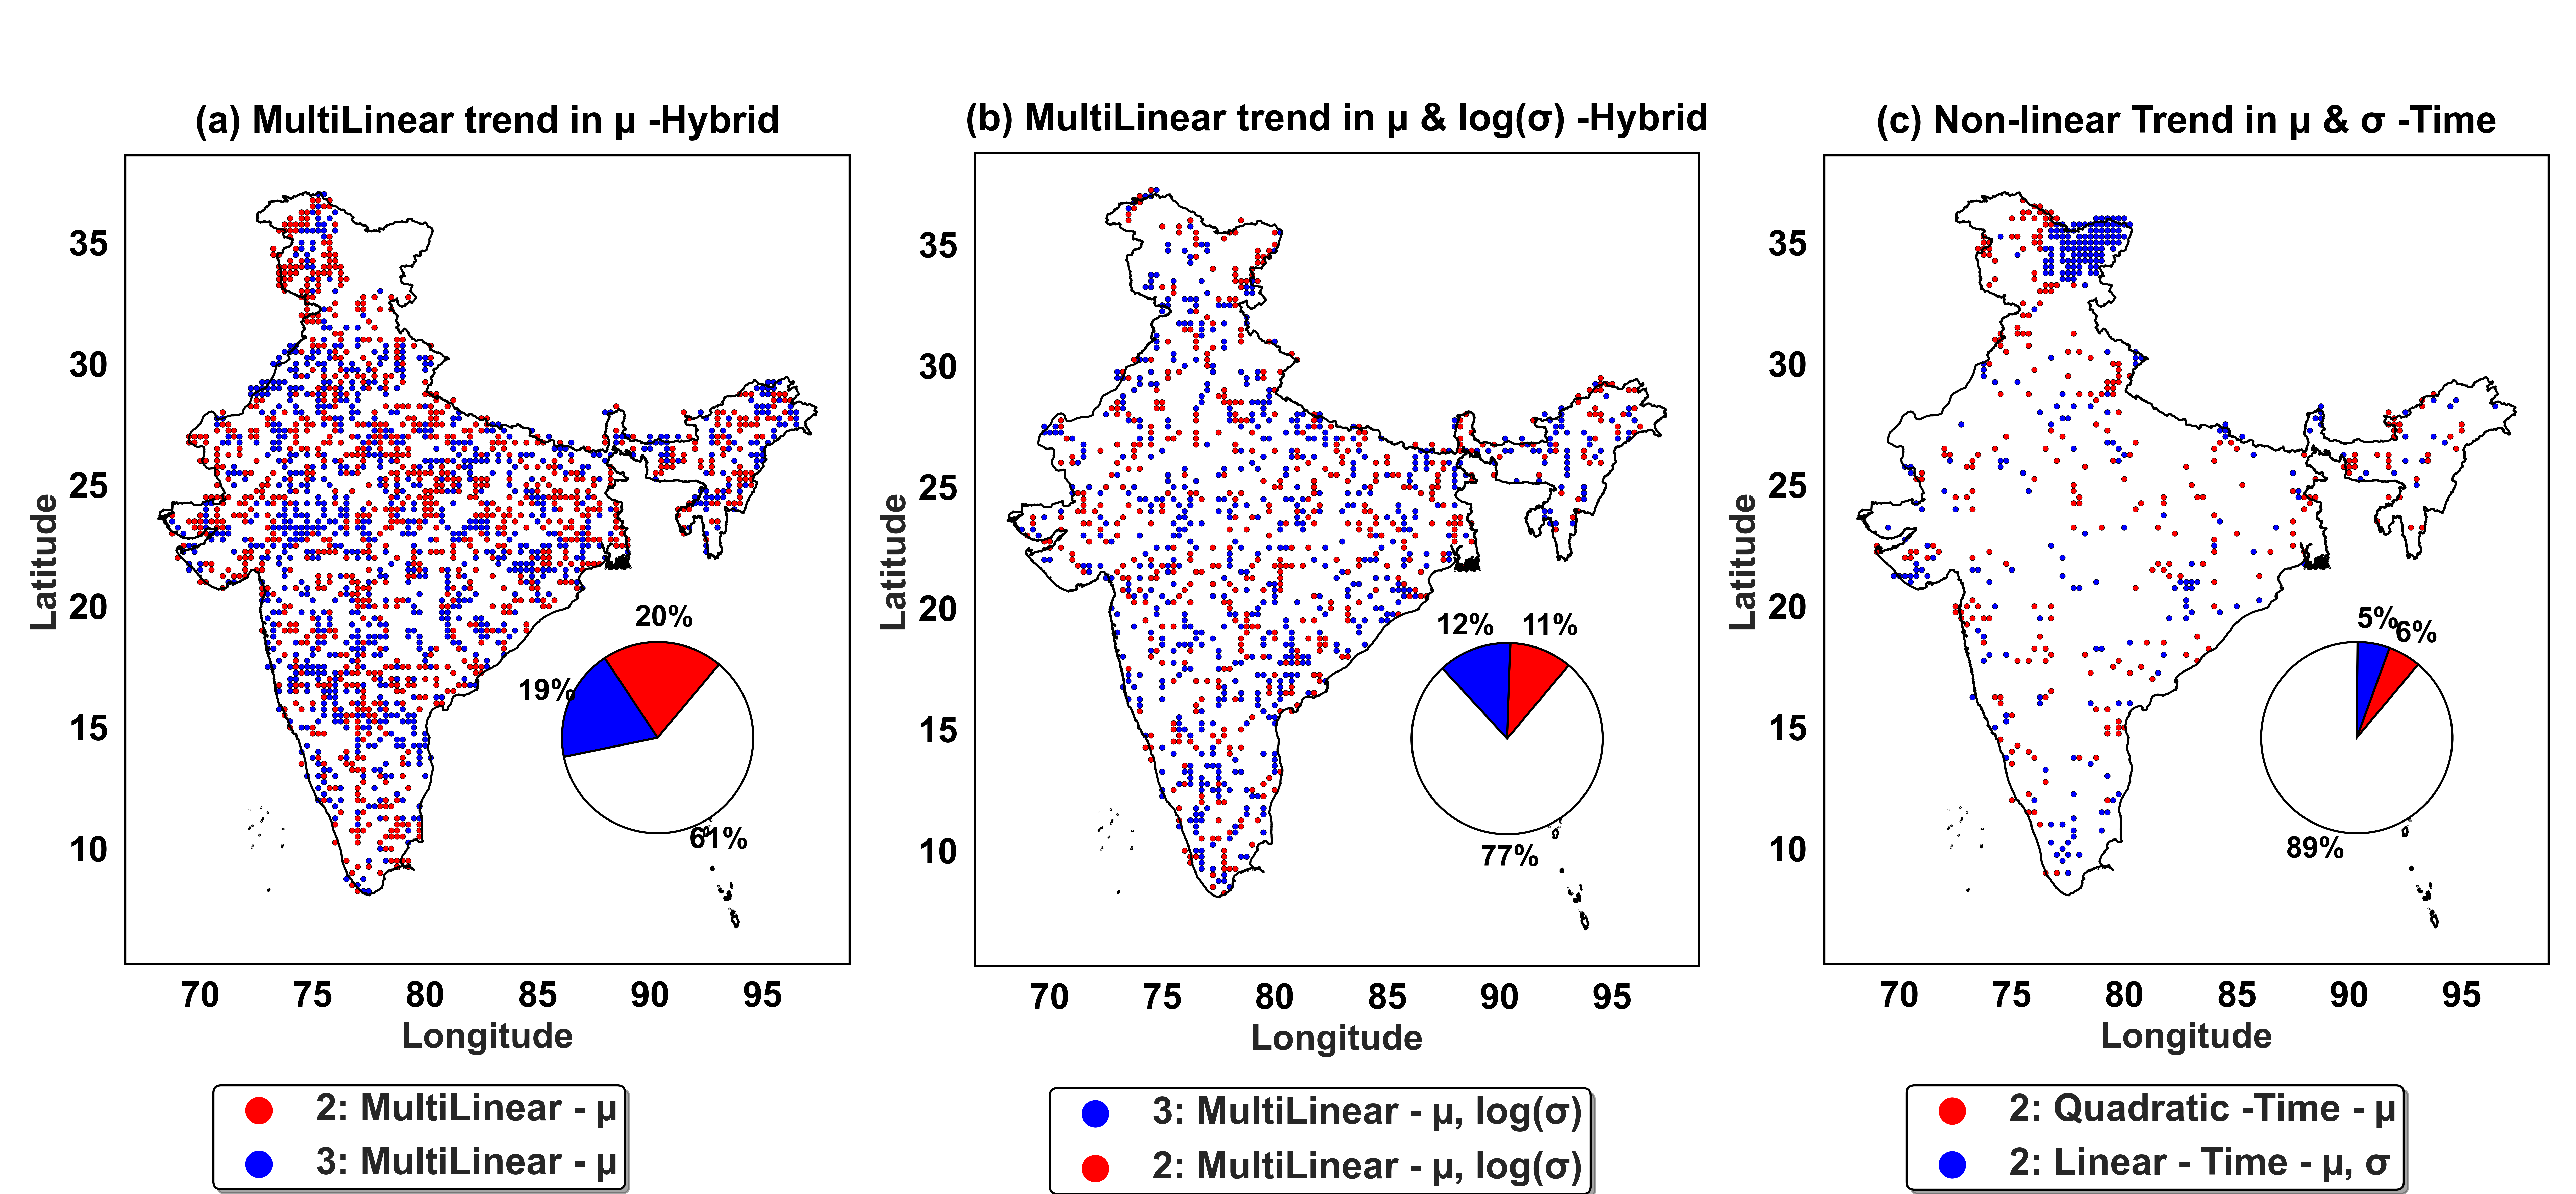

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,7.88), dpi=300)

shp1 = gpd.read_file("P:\\G\\SpatialData\\India_Boundary\\india_boundary_WGS1984.shp")
legend_properties = {'weight': 'bold', 'size': 18}

## Linear hybrid
sns.scatterplot(data=df1, x="lon", y="lat", hue='model name', ax=ax[0], marker='o', s=7,
                palette=["red", "blue"], edgecolor='black')

ax[0].set_title('(a) MultiLinear trend in μ -Hybrid', fontsize = 18, fontweight = 'bold', x = 0.5, y=1.015)
ax[0].legend(frameon=True, markerscale=2, prop = legend_properties, bbox_to_anchor=(0.69, -0.15),fancybox=True, framealpha=1, 
           shadow=True, borderpad=0.2)
## Exponential hybrid

sns.scatterplot(data=df2, x="lon", y="lat", hue='model name', ax=ax[1], marker='o', s=7,
                palette=["blue", "red"], edgecolor='black')
ax[1].set_title('(b) MultiLinear trend in μ & log(σ) -Hybrid', fontsize=18, fontweight='bold', x=0.5, y=1.015)

ax[1].legend(frameon=True, markerscale=2, prop = legend_properties, bbox_to_anchor=(0.85, -0.15),fancybox=True, framealpha=1, 
           shadow=True, borderpad=0.2)
## Time models
sns.scatterplot(data=df3, x="lon", y="lat", hue='model name', ax=ax[2], marker='o', s=7,
                palette=["red", "blue"], edgecolor='black')
ax[2].set_title('(c) Non-linear Trend in μ & σ -Time', fontsize=18, fontweight='bold', x=0.5, y=1.015)

ax[2].legend(frameon=True, markerscale=2, prop = legend_properties, bbox_to_anchor=(0.8, -0.15),fancybox=True, framealpha=1, 
           shadow=True, borderpad=0.2)
for a in [ax[0], ax[1], ax[2]]:
    shp1.plot(color='None', edgecolor='black', ax=a, linewidth=1)
    a.grid(False)
    a.set_xlabel('Longitude', fontsize=17, fontweight='bold')
    a.set_ylabel('Latitude', fontsize=17, fontweight='bold')
    for label in (a.get_xticklabels() + a.get_yticklabels()):
        label.set_fontsize(17)
        label.set_fontweight('bold')
    for axis in ['top', 'bottom', 'left', 'right']:
        a.spines[axis].set_linewidth(1)
        a.spines[axis].set_edgecolor("black")

#### MultiLinear trend in Location-Hybrid
neg1 = len(df1[df1['model name'] == aa[0]])
pos1 = len(df1[df1['model name'] == aa[1]])
w1 = 4964 - neg1 - pos1
data1= [neg1, pos1, w1]
percentages1 = [(count / 4964) * 100 for count in data1]
colors = ['red', 'blue', 'white']
axesIns1 = inset_axes(ax[0], width="100%", height="100%",
                         bbox_to_anchor=(0.57, 0.115, .33, .33),
                         bbox_transform=ax[0].transAxes, loc='lower left', borderpad=0)
axesIns1.grid(False)
axesIns1.tick_params(left=True, right=False, labelleft=True, labelright=False)
axesIns1.pie(percentages1, labels=None, startangle=50, wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'},
                autopct='%1.0f%%', pctdistance=1.25, textprops={'fontsize': 14, 'fontweight': 'bold', 'color': 'black'},
                colors=colors)
#### MultiLinear trend in Location & log-scale-Hybrid
neg2 = len(df2[df2['model name'] == bb[0]])
pos2 = len(df2[df2['model name'] == bb[1]])
w2 = 4964 - neg2 - pos2
data2= [neg2, pos2, w2]
percentages2 = [(count / 4964) * 100 for count in data2]
colors = ['red', 'blue', 'white']
axesIns2 = inset_axes(ax[1], width="100%", height="100%",
                         bbox_to_anchor=(0.57, 0.115, .33, .33),
                         bbox_transform=ax[1].transAxes, loc='lower left', borderpad=0)
axesIns2.grid(False)
axesIns2.tick_params(left=True, right=False, labelleft=True, labelright=False)
axesIns2.pie(percentages2, labels=None, startangle=50, wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'},
                autopct='%1.0f%%', pctdistance=1.25, textprops={'fontsize':14, 'fontweight': 'bold', 'color': 'black'},
                colors=colors)
#### Non-linear Trend in Location & scale-Time
neg3 = len(df3[df3['model name'] == cc[0]])
pos3 = len(df3[df3['model name'] == cc[1]])
w3 = 4964 - neg3 - pos3
data3= [neg3, pos3, w3]
percentages3 = [(count /4964) * 100 for count in data3]
colors = ['red', 'blue', 'white']
axesIns3 = inset_axes(ax[2], width="100%", height="100%",
                         bbox_to_anchor=(0.57, 0.115, .33, .33),
                         bbox_transform=ax[2].transAxes, loc='lower left', borderpad=0)
axesIns3.grid(False)
axesIns3.tick_params(left=True, right=False, labelleft=True, labelright=False)
axesIns3.pie(percentages3, labels=None, startangle=50, wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'},
                autopct='%1.0f%%', pctdistance=1.25, textprops={'fontsize': 14, 'fontweight': 'bold', 'color': 'black'},
                colors=colors)

fig.tight_layout()
plt.show()
fig.savefig('P:\\G\\1.1 research\\result_pics\\3 best_models.tif', dpi=300)

grid    lon    lat  model_no                  model name  Unnamed: 5  \
11      g12  68.75  23.00        45             2hybrid_lin_loc         NaN   
12      g13  68.75  23.25        64  3hybrid_lin_loc_exp(scale)         NaN   
13      g14  68.75  23.50        63             3hybrid_lin_loc         NaN   
14      g15  68.75  23.75        45             2hybrid_lin_loc         NaN   
18      g19  69.00  22.00        45             2hybrid_lin_loc         NaN   
...     ...    ...    ...       ...                         ...         ...   
4937  g4938  96.25  28.50        45             2hybrid_lin_loc         NaN   
4942  g4943  96.50  27.50        63             3hybrid_lin_loc         NaN   
4943  g4944  96.50  27.75        63             3hybrid_lin_loc         NaN   
4944  g4945  96.50  28.00        63             3hybrid_lin_loc         NaN   
4945  g4946  96.50  28.25        30            2lin_loc&sc_time         NaN   

             RP    max_prep  
11    34.643377  205.087809  
12    11.540631  235.458435  
13     1.000000  259.102656  
14    33.284543  185.674576  
18    38.759509  194.925949  
...         ...         ...  
4937  46.758707  237.085440  
4942        NaN  145.823410  
4943        NaN  150.689963  
4944        NaN  144.494933  
4945   1.836019  148.167189  

[3637 rows x 8 columns]